In [1]:
# Setup
from notebook_utils import resolve_paths_from_parent_directory

# auto reload notebook deps
%reload_ext autoreload
%autoreload 2
resolve_paths_from_parent_directory()

In [6]:
import torch
import torch.optim as optim
from utils import (
    split_img, 
    ToPILImage, 
    ToTensor
)
from objective import (
    LG_c,
    LG_x,
    LG_y,
    LRec,
    LOrth,
    LCyc
)
from tqdm import tqdm
from train import train
from model import SupUCA
from dataset import MNISTHalves
from torchvision import datasets
from matplotlib import pyplot as plt
from torch.utils.data import DataLoader

In [3]:
# set device
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# load training data
train_dataset = datasets.MNIST(root='../data/', train=True, download=True)
train_x = []
train_y = []

for i in tqdm(range(train_dataset.data.shape[0])):
    img = ToPILImage(train_dataset.data[i])
    x, y = split_img(img)
    train_x.append(ToTensor(x))
    train_y.append(ToTensor(y))

train_x = torch.stack(train_x)
train_y = torch.stack(train_y)

# load test data
test_dataset = datasets.MNIST(root='../data/', train=False, download=True)
test_x = []
test_y = []

for i in tqdm(range(test_dataset.data.shape[0])):
    img = ToPILImage(test_dataset.data[i])
    x, y = split_img(img)
    test_x.append(ToTensor(x))
    test_y.append(ToTensor(y))

test_x = torch.stack(test_x)
test_y = torch.stack(test_y)

# build datasets / data loaders
batch_size = 128
train_data = MNISTHalves(train_x, train_y)
test_data = MNISTHalves(test_x, test_y)
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False)

# build model
model = SupUCA()
model.to(device)

# set optimizer
optimizer = optim.SGD(model.parameters(), lr=1e-2, momentum=0.9, weight_decay=1e-5)

100%|██████████| 10000/10000 [00:06<00:00, 1488.23it/s]


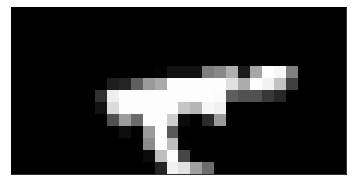

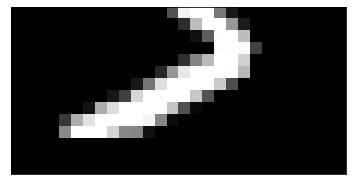

In [4]:
x, y = split_img(ToPILImage(train_dataset.data[0]))

plt.imshow(x, cmap='gray', interpolation='none')
plt.xticks([])
plt.yticks([])
plt.show()

plt.imshow(y, cmap='gray', interpolation='none')
plt.xticks([])
plt.yticks([])
plt.show()

In [5]:
print(ToTensor(x).shape)
print(ToTensor(y).shape)

torch.Size([1, 14, 28])
torch.Size([1, 14, 28])


In [7]:
train(model, optimizer, train_loader, test_loader, device, epochs=1)

0 0.06349693238735199 0.10509408265352249 0.11467324197292328 0.2192566990852356 232.5701141357422 0.20023559033870697
1 490.0840759277344 114.28065490722656 109.03402709960938 210.20285034179688 7097856.0 1417.6123046875
2 47414160.0 10089493504.0 119738536.0 372025216.0 606750310400.0 1.5434587109342786e+20
3 6.072836359759304e+30 inf inf inf 1.1292195894159936e+35 nan
4 nan nan nan nan nan nan
5 nan nan nan nan nan nan
6 nan nan nan nan nan nan
7 nan nan nan nan nan nan
8 nan nan nan nan nan nan
9 nan nan nan nan nan nan
10 nan nan nan nan nan nan
11 nan nan nan nan nan nan
12 nan nan nan nan nan nan
13 nan nan nan nan nan nan
14 nan nan nan nan nan nan
15 nan nan nan nan nan nan
16 nan nan nan nan nan nan
17 nan nan nan nan nan nan
18 nan nan nan nan nan nan
19 nan nan nan nan nan nan
20 nan nan nan nan nan nan
21 nan nan nan nan nan nan
22 nan nan nan nan nan nan
23 nan nan nan nan nan nan
24 nan nan nan nan nan nan
25 nan nan nan nan nan nan
26 nan nan nan nan nan nan
27 nan nan 